# pycontextfree tutorial

let's import pycontextfree:

In [16]:
import contextfree as cf

before you draw something you have to initialize the drawing surface.
This is dones with `init` command

In [19]:
cf.init(canvas_size=(200,200))

Let's draw someting, say a cricle: 

In [22]:
cf.circle()

and render it as IPython image

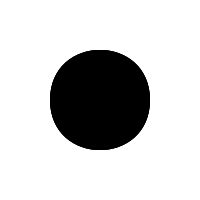

In [23]:
cf.display_ipython()

there some other primitive shapes in contextfree, including box

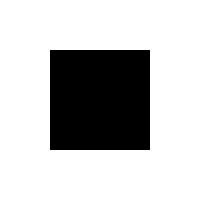

In [25]:
cf.init(canvas_size=(200,200))
cf.box()
cf.display_ipython()

and trianlge etc

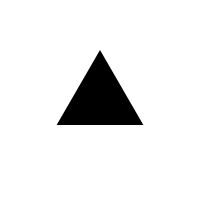

In [15]:
cf.init(canvas_size=(200,200))
cf.triangle()
cf.display_ipython()